In [638]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [639]:
print(os.listdir("../input"))

['heart-disease-uci']


In [640]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [641]:
df=pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [642]:
df['age']=(df['age']-df['age'].min())/(df['age'].max()-df['age'].min())
df['trestbps']=(df['trestbps']-df['trestbps'].min())/(df['trestbps'].max()-df['trestbps'].min())
df['thalach']=(df['thalach']-df['thalach'].min())/(df['thalach'].max()-df['thalach'].min())
df['chol']=(df['chol']-df['chol'].min())/(df['chol'].max()-df['chol'].min())
df['oldpeak']=(df['oldpeak']-df['oldpeak'].min())/(df['oldpeak'].max()-df['oldpeak'].min())

In [643]:
x=df.drop(['target'],axis=1)
y=df['target']

In [644]:
X_train, X_test, y_train, y_test = train_test_split(x,y ,test_size=0.3)

In [645]:
def kcls(n):
  #Create KNN Classifier
  knn = KNeighborsClassifier(n)
  #Train the model using the training sets
  knn.fit(X_train, y_train)
  #Predict the response for test dataset
  y_pred = knn.predict(X_test)
  return metrics.accuracy_score(y_test, y_pred)

In [646]:
a=[i for i in range(1,20,2)]
b=[kcls(i) for i in range(1,20,2)]
acc=max(b)
k=max(a)

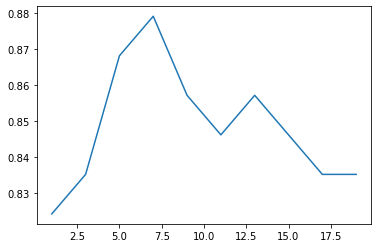

In [647]:
plt.plot(a,b)
plt.show()

In [648]:
print('The maximum accuracy obtained is %f and k=3'%acc)

The maximum accuracy obtained is 0.879121 and k=3
